### Import Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
import string
import re


sns.set()

### Load the Dataset

In [4]:
df = pd.read_csv('Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


### Exploratory Data Analysis

In [6]:
df['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
df.shape

(568454, 10)

### Checking for Null values

In [10]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [11]:
df.dropna(subset={'Summary','ProfileName'},inplace=True)

In [12]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [13]:
df.rename(columns={'Text':'review_text','Score':'Rating'}, inplace=True)

In [14]:
df = df[['review_text','Rating','Summary']]

In [15]:
df.shape

(568401, 3)

###  Clean Review Text (Punctuation, Spaces)

In [17]:
# 1. Pre-split cleaning: punctuation, emojis, spaces
import re
import string

def basic_clean(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)         # Remove URLs
    text = re.sub(r'<.*?>', '', text)                           # Remove HTML tags
    text = re.sub(r'[^\x00-\x7F]', '', text)                    # Remove non-ASCII (emojis etc.)
    text = re.sub(rf"[{re.escape(string.punctuation)}]", '', text)  # Remove all punctuation
    text = re.sub(r'\s+', ' ', text).strip()                    # Normalize whitespace
    return text


In [18]:
df['review_text'] = df['review_text'].apply(basic_clean)
df['Summary'] = df['Summary'].apply(basic_clean)


C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_11100\3377369185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].apply(basic_clean)
C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_11100\3377369185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Summary'] = df['Summary'].apply(basic_clean)


In [19]:
print(df['review_text'].head())

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: review_text, dtype: object


### Checking  for Duplicate values

In [21]:
df.duplicated().sum()

173916

In [22]:
# Example with keep=False to see all duplicates (first + later)
print(df[df.duplicated(keep=False)].head(10))



                                           review_text  Rating  \
3    if you are looking for the secret ingredient i...       2   
10   i dont know if its the cactus or the tequila o...       5   
29   i dont know if its the cactus or the tequila o...       5   
68   if youre impulsive like me then 6 is ok dont g...       3   
69   this was sooooo deliscious but too bad i ate e...       5   
73   buyer beware please this sweetener is not for ...       1   
96   my 112 year old basenjijack russell mix loves ...       5   
100  the mouth says how do i love thee let me count...       5   
101  arrived slightly thawed my parents wouldnt acc...       4   
102  the crust on these tarts are perfect my husban...       4   

                                               Summary  
3                                       cough medicine  
10                     the best hot sauce in the world  
29                     the best hot sauce in the world  
68   how much would you pay for a bag of choc

In [23]:
df= df.drop_duplicates(keep='first')

In [24]:
df.shape

(394485, 3)

#### Statistics of Rating

In [26]:
df.describe()

,Rating
count,394485.000000
mean,4.179066
std,1.312351
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Remove Conflicting Reviews (Same text, different ratings)

In [28]:
# Find reviews with more than 1 unique rating
conflicting_reviews_text = (
    df.groupby('review_text')['Rating']
      .nunique()
      .reset_index()
)

# Keep only those with more than 1 unique rating
# Group and filter for reviews with more than 1 unique rating
conflicting_reviews = df.groupby('review_text').filter(lambda x: x['Rating'].nunique() > 1)

# Print them sorted for easy comparison
print(conflicting_reviews.sort_values('review_text').head(10))


                                              review_text  Rating  \
446363                                                          4   
101732                                                          5   
93595                                                           5   
346479                                                          5   
109186  a few years ago my cat was diagnosed with food...       4   
6000    a few years ago my cat was diagnosed with food...       5   
207539  a ming dynasty ad 1368 1644 creation believed ...       4   
78744   a ming dynasty ad 1368 1644 creation believed ...       5   
73957   after trying both the chipotle as well as the ...       5   
313809  after trying both the chipotle as well as the ...       4   

                                                  Summary  
446363                                  works as promised  
101732                                   starbucks tdiscs  
93595   great buy by buying in bulk and autoship it cu...  


In [29]:
# Group by review_text and check if more than 1 unique rating exists
conflict_mask = df.groupby('review_text')['Rating'].transform('nunique') > 1

# Keep only non-conflicting rows
df_no_conflict = df[~conflict_mask]

print("Original size:", len(df))
print("Without conflicts:", len(df_no_conflict))


Original size: 394485
Without conflicts: 394216


In [30]:
df_no_conflict['Rating'].value_counts()

Rating
5    251218
4     56053
1     36385
3     29763
2     20797
Name: count, dtype: int64

In [31]:
# Confirm no conflicts remain
check = df_no_conflict.groupby('review_text')['Rating'].nunique()
print("Max unique ratings per reviewText:", check.max())

Max unique ratings per reviewText: 1


## Data Visualisation
#### Rating distribuion before balancing

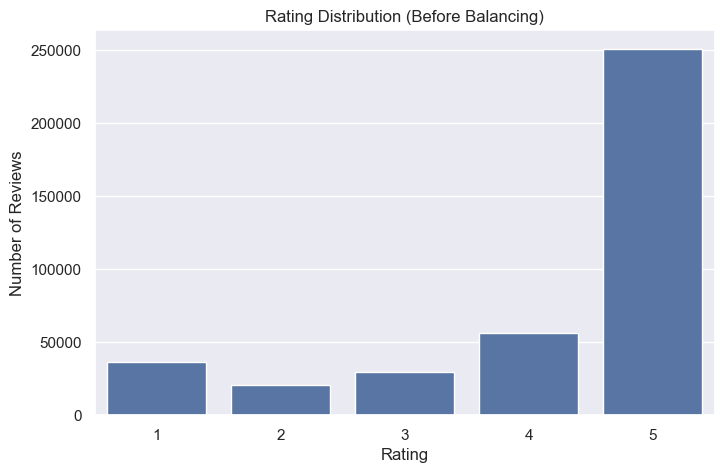

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=df_no_conflict)
plt.title("Rating Distribution (Before Balancing)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

### Pie chart showing the rating percentage distribution

In [35]:
rating_counts = df_no_conflict['Rating'].value_counts().sort_index()

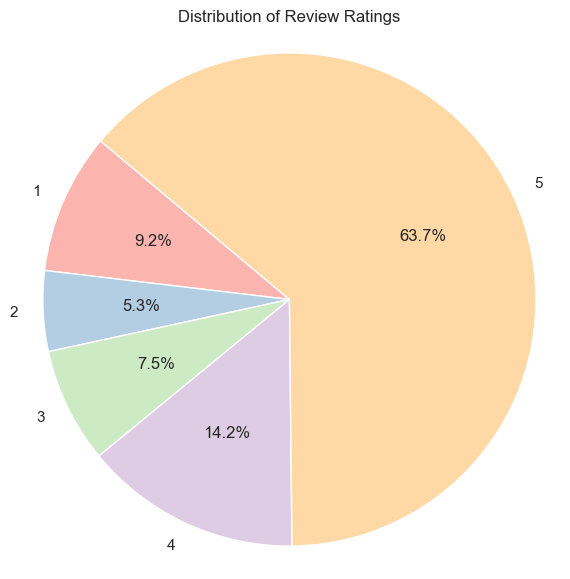

In [36]:
# Labels and sizes
labels = rating_counts.index.astype(str)
sizes = rating_counts.values

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Review Ratings')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.show()

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_11100\988516497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_conflict['review_length'] = df_no_conflict['review_text'].str.split().str.len()


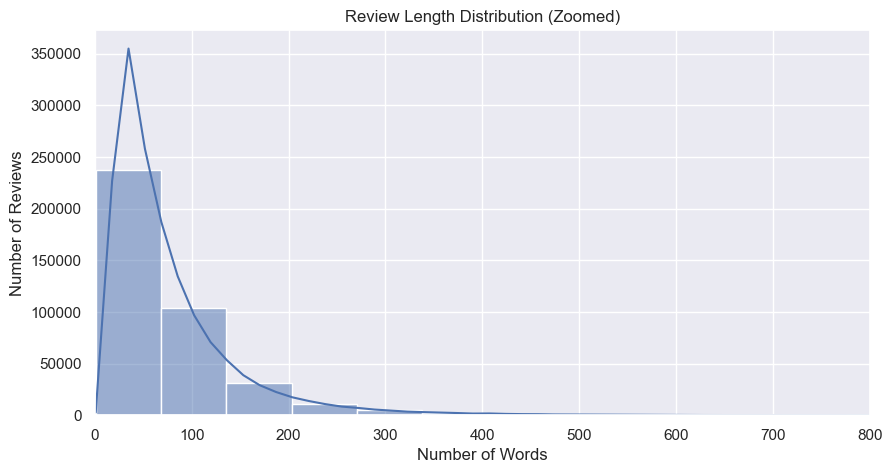

In [37]:
df_no_conflict['review_length'] = df_no_conflict['review_text'].str.split().str.len()

plt.figure(figsize=(10, 5))
sns.histplot(data=df_no_conflict, x='review_length', bins=50, kde=True)


plt.xlim(0, 800)  

plt.title("Review Length Distribution (Zoomed)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()

In [38]:
df_no_conflict['Rating'].value_counts()

Rating
5    251218
4     56053
1     36385
3     29763
2     20797
Name: count, dtype: int64

In [39]:
df_filtered = df_no_conflict[
    (df_no_conflict['review_length'] > 3) & 
    (df_no_conflict['review_length'] <= 500)
]

In [40]:
print("Before filtering:", len(df_no_conflict))
print("After filtering:", len(df_filtered))

Before filtering: 394216
After filtering: 392862


In [41]:
df_filtered['Rating'].value_counts()

Rating
5    250500
4     55770
1     36250
3     29632
2     20710
Name: count, dtype: int64

In [42]:
# Define your target counts (imbalance)
target_counts = {
    1: 12600,
    2: 20710,
    3: 29632,
    4: 37775,
    5: 25184
}

# Collect sampled data
imbalanced_data = []

# Sample from each class
for rating, count in target_counts.items():
    # Filter the class
    class_df = df_filtered[df_filtered['Rating'] == rating]

    # Sample without replacement (random_state for reproducibility)
    sampled = class_df.sample(n=count, random_state=42)

    # Append to list
    imbalanced_data.append(sampled)

# Concatenate all into one final imbalanced dataset
df_imbalanced = pd.concat(imbalanced_data).reset_index(drop=True)

# Shuffle the final dataset
df_imbalanced = df_imbalanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [43]:
#df_imbalanced.to_csv('fullstack-imbalanced-dataset.csv')

In [44]:
df_imbalanced['word_count'] = df_imbalanced['review_text'].apply(lambda x: len(str(x).split()))
#display the statistics of the word count
min_word_counts = df_imbalanced.groupby('Rating')['word_count'].describe()
print(min_word_counts)


          count       mean        std  min   25%   50%    75%    max
Rating                                                              
1       12600.0  78.237619  62.497398  5.0  36.0  60.0   98.0  496.0
2       20710.0  85.778513  67.255962  6.0  39.0  66.0  109.0  499.0
3       29632.0  91.213890  73.107557  5.0  40.0  69.0  118.0  500.0
4       37775.0  86.542634  71.288141  6.0  37.0  64.0  111.0  499.0
5       25184.0  71.448499  60.951134  7.0  32.0  52.0   88.0  500.0


In [45]:
from collections import Counter

ratings = sorted(df_imbalanced['Rating'].unique())

for r in ratings:
    # Combine review_text and summary for this rating
    texts = df_imbalanced[df_imbalanced['Rating'] == r][['review_text', 'Summary']]
    
    # Combine all text into a single string
    all_text = ' '.join(texts['review_text'].astype(str)) + ' ' + ' '.join(texts['Summary'].astype(str))
    
    # Optional: simple preprocessing (lowercase, remove punctuation)
    all_text = all_text.lower()
    all_text = ''.join(c for c in all_text if c.isalnum() or c.isspace())
    
    # Split into words
    words = all_text.split()
    
    # Unique words and counts
    unique_words = set(words)
    word_counts = Counter(words)
    
    print(f"Rating: {r}")
    print(f"Number of unique words: {len(unique_words)}")
    print(f"Top 10 most frequent words: {word_counts.most_common(10)}\n")


Rating: 1
Number of unique words: 35197
Top 10 most frequent words: [('the', 45667), ('i', 36265), ('and', 26205), ('a', 22948), ('to', 22941), ('it', 21088), ('of', 18385), ('this', 17673), ('is', 14697), ('not', 13114)]

Rating: 2
Number of unique words: 48876
Top 10 most frequent words: [('the', 84943), ('i', 64371), ('and', 44802), ('a', 44682), ('to', 41054), ('it', 39849), ('of', 34686), ('this', 27748), ('is', 26577), ('not', 25187)]

Rating: 3
Number of unique words: 64340
Top 10 most frequent words: [('the', 127184), ('i', 91012), ('a', 76466), ('and', 64847), ('to', 62840), ('it', 60488), ('of', 52382), ('is', 44559), ('this', 37804), ('but', 37716)]

Rating: 4
Number of unique words: 73476
Top 10 most frequent words: [('the', 143906), ('a', 103064), ('i', 102088), ('and', 88775), ('to', 75905), ('it', 71517), ('of', 61980), ('is', 57937), ('this', 45893), ('for', 44125)]

Rating: 5
Number of unique words: 50180
Top 10 most frequent words: [('the', 72767), ('i', 59083), ('and

In [46]:
# Loop through each rating
ratings = sorted(df_imbalanced['Rating'].unique())

for r in ratings:
    subset = df_imbalanced[df_imbalanced['Rating'] == r][['review_text', 'Summary']].drop_duplicates()
    
    print(f"\n===== Rating {r} =====")
    
    # Print first 15 unique pairs
    for i, row in subset.head(30).iterrows():
        print(f"Review: {row['review_text']}")
        print(f"Summary: {row['Summary']}")
        print("-" * 50)


===== Rating 1 =====
Review: zico used to be my coconut water of choice when i first saw the new packaging i was excited that it would be easier to close and store i was shocked when i tasted it it is not the same product the taste really turned me off ive since switched to one coconut wateri also determined that the new bottle size is too big of a serving i like to drink coconut water before going to the gym because ive found it helps with endurance it is not as convenient for me to carry the larger by about 3 oz bottle especially since i cant finish the entire thing in one sitting
Summary: bad product update
--------------------------------------------------
Review: this tastes nothing like coffee and you cant return it even adding creamer doesnt help the risk wasnt worth it
Summary: horrible
--------------------------------------------------
Review: dont believe you are getting tippy golden assam as the picture on the box suggestsonce again i was deceived in believing that the litt

In [47]:
# Check counts
print("Imbalanced class distribution:\n", df_imbalanced['Rating'].value_counts())

Imbalanced class distribution:
 Rating
4    37775
3    29632
5    25184
2    20710
1    12600
Name: count, dtype: int64


In [48]:
df_imbalanced.shape

(125901, 5)

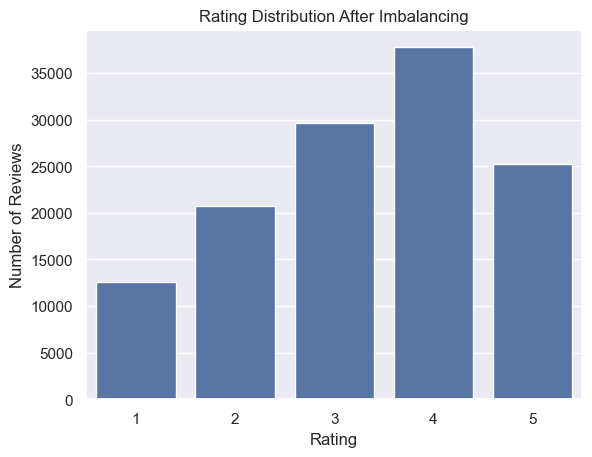

In [49]:
sns.countplot(x='Rating', data=df_imbalanced)
plt.title("Rating Distribution After Imbalancing")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

In [62]:
rating_counts_imbalanced = df_imbalanced['Rating'].value_counts().sort_index()

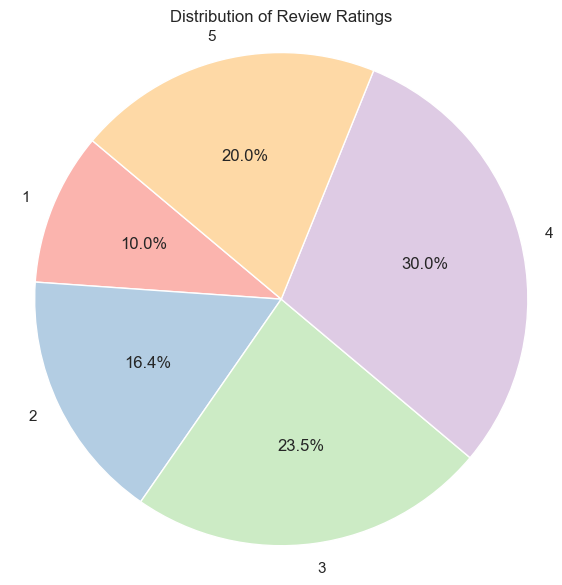

In [76]:
# Labels and sizes
labels = rating_counts_imbalanced.index.astype(str)
sizes = rating_counts_imbalanced.values

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Review Ratings')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.show()

In [5]:
df1 = pd.read_csv('fullstack-imbalanced-dataset.csv')

In [7]:
import re
from collections import Counter

# Predefined food keywords (your big set)
food_items = {
    # Fruits
    "apple","apples","banana","bananas","orange","oranges","mango","mangoes",
    "grape","grapes","pear","pears","peach","peaches","plum","plums","kiwi","melon","melons",
    "watermelon","pineapple","papaya","guava","lemon","lemons","lime","limes","cherry","cherries",
    "strawberry","strawberries","blueberry","blueberries","raspberry","raspberries","blackberry","blackberries",
    "fig","figs","date","dates","coconut","pomegranate","avocado",

    # Vegetables
    "potato","potatoes","tomato","tomatoes","onion","onions","garlic","carrot","carrots","spinach",
    "cabbage","broccoli","cauliflower","peas","pea","beans","lentils","corn","lettuce","cucumber",
    "zucchini","pumpkin","beetroot","okra","chili","chilies","pepper","peppers","mushroom","mushrooms",
    "ginger","celery","radish","turnip","eggplant","brinjal","asparagus","kale",

    # Grains / Staples
    "rice","wheat","flour","bread","pasta","spaghetti","noodles","oats","oatmeal","barley",
    "quinoa","millet","cereal","cornflakes","granola","tortilla","biscuit","biscuits","cracker","crackers",

    # Dairy & Eggs
    "milk","butter","cheese","cream","yogurt","curd","paneer","ghee","icecream","ice cream",
    "egg","eggs",

    # Meat & Seafood
    "chicken","beef","pork","mutton","lamb","turkey","duck","fish","salmon","tuna","shrimp","prawn","prawns",
    "crab","lobster","sardine","anchovy","oyster","clam","squid","octopus","steak","ham","bacon","sausage",

    # Beverages
    "coffee","tea","latte","cappuccino","espresso","mocha","milkshake","smoothie","juice","soda","cola",
    "pepsi","coke","beer","wine","whiskey","rum","vodka","gin","brandy","water","lemonade",

    # Sweets & Snacks
    "cake","cakes","pastry","pastries","donut","donuts","cookie","cookies","brownie","brownies","muffin","muffins",
    "chocolate","candies","candy","toffee","marshmallow","pudding","pie","tart","icecream","ice cream",
    "chips","crisps","nachos","popcorn","snack","snacks","cracker","crackers","wafer","wafers",

    # Condiments & Spices
    "salt","sugar","pepper","chili","cinnamon","clove","cloves","nutmeg","cardamom","turmeric","curry",
    "mustard","vinegar","sauce","ketchup","mayonnaise","mayo","soy","soysauce","hot sauce","salsa","chutney",
    "herbs","oregano","thyme","basil","parsley","rosemary","mint","dill","coriander","cilantro",

    # Oils & Nuts
    "oil","olive","olive oil","sunflower oil","coconut oil","groundnut oil","almond","almonds","cashew","cashews",
    "peanut","peanuts","hazelnut","hazelnuts","walnut","walnuts","pistachio","pistachios","sesame","chia","flaxseed",

    # Misc & Processed Foods
    "burger","burgers","pizza","sandwich","sandwiches","wrap","wraps","taco","tacos","hotdog","hotdogs",
    "pancake","pancakes","waffle","waffles","dosa","idli","samosa","biryani","curry","soup","soups","broth",
    "syrup","jam","jelly","honey","pickles","pickle","kimchi","sauerkraut"
}

# Simple preprocessing
def simple_preprocess(text):
    text = str(text).lower()
    tokens = re.findall(r"[a-z]+", text)
    return tokens

# Collect all tokens from df1.review_text
all_tokens = []
for review in df1["review_text"]:
    all_tokens.extend(simple_preprocess(review))

# Keep only food-related words
food_mentions = [w for w in all_tokens if w in food_items]

# Count top food items
food_counts = Counter(food_mentions).most_common()

# Just keep unique food items mentioned (sorted by frequency)
food_only_list = [food for food, count in food_counts]

print("Food items mentioned in reviews:")
print(food_only_list)


Food items mentioned in reviews:
['coffee', 'tea', 'chocolate', 'water', 'sugar', 'milk', 'sauce', 'cookies', 'oil', 'snack', 'salt', 'cereal', 'butter', 'rice', 'candy', 'chicken', 'juice', 'coconut', 'cheese', 'beans', 'peanut', 'corn', 'chips', 'honey', 'cookie', 'syrup', 'soup', 'bread', 'ginger', 'cream', 'pasta', 'popcorn', 'cinnamon', 'crackers', 'noodles', 'lemon', 'wheat', 'date', 'soda', 'flour', 'orange', 'apple', 'soy', 'beef', 'espresso', 'granola', 'cake', 'oatmeal', 'pepper', 'snacks', 'fish', 'cherry', 'olive', 'strawberry', 'almond', 'peanuts', 'almonds', 'mint', 'pumpkin', 'salmon', 'chili', 'potato', 'garlic', 'tuna', 'oats', 'peach', 'candies', 'banana', 'yogurt', 'blueberry', 'cracker', 'wine', 'hazelnut', 'mango', 'vinegar', 'grape', 'lime', 'curry', 'raspberry', 'tomato', 'jelly', 'bacon', 'eggs', 'egg', 'tart', 'pomegranate', 'pie', 'turkey', 'mocha', 'potatoes', 'soups', 'taco', 'pancakes', 'broth', 'latte', 'biscuits', 'pork', 'tomatoes', 'pizza', 'onion', 'br

In [103]:
import spacy
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
# Manually remove unwanted tokens
stop_words.add("nt")

# Load spacy in faster mode (disable parser, ner)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "tagger"])


def get_unique_word_stats(df, text_col="review_text", summary_col="Summary", rating_col="Rating"):
    results = {}
    
    for rating in sorted(df[rating_col].unique()):
        # Combine review_text + summary
        texts = df[df[rating_col] == rating][text_col].astype(str) + " " + df[df[rating_col] == rating][summary_col].astype(str)
        all_words = []
        
        for doc in nlp.pipe(texts, batch_size=500):
            tokens = [
                token.text.lower() 
                for token in doc 
                if token.is_alpha and token.text.lower() not in stop_words
            ]
            all_words.extend(tokens)
        
        counter = Counter(all_words)
        
        if counter:
            max_word = counter.most_common(1)[0]
            mid_words = counter.most_common(21)[1:]  # next 20 after max
            min_word = min(counter.items(), key=lambda x: x[1])
            
            results[rating] = {
                "Max Word": max_word,
                "Mid Words (up to 20)": mid_words,
                "Min Word": min_word
            }
        else:
            results[rating] = {
                "Max Word": None,
                "Mid Words (up to 20)": [],
                "Min Word": None
            }
    
    return results

# Example usage:
results = get_unique_word_stats(df_imbalanced, text_col="review_text", summary_col="Summary", rating_col="Rating")

for rating, stats in results.items():
    print(f"\nRating: {rating}")
    print(" Max Word:", stats["Max Word"])
    print(" Mid Words (up to 20):", stats["Mid Words (up to 20)"])
    print(" Min Word:", stats["Min Word"])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\TOSHIBA\anaconda3\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
C:\Users\TOSHIBA\anaconda3\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
C:\Users\TOSHIBA\anaconda3\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tok


Rating: 1
 Max Word: ('like', 6055)
 Mid Words (up to 20): [('product', 5654), ('taste', 4662), ('would', 4201), ('one', 4042), ('good', 3001), ('coffee', 2979), ('buy', 2574), ('even', 2528), ('food', 2469), ('flavor', 2428), ('get', 2363), ('amazon', 2338), ('tea', 2163), ('bad', 2050), ('could', 1966), ('really', 1831), ('box', 1808), ('tried', 1757), ('bought', 1746), ('time', 1685)]
 Min Word: ('tippy', 1)

Rating: 2
 Max Word: ('like', 13357)
 Mid Words (up to 20): [('taste', 10580), ('would', 7959), ('product', 7904), ('good', 7780), ('flavor', 7602), ('one', 6765), ('coffee', 6076), ('much', 4961), ('tea', 4888), ('really', 4546), ('get', 4363), ('better', 3597), ('even', 3516), ('buy', 3445), ('food', 3381), ('great', 3253), ('chocolate', 3027), ('could', 3015), ('tried', 2968), ('try', 2937)]
 Min Word: ('unresponsiveness', 1)

Rating: 3
 Max Word: ('like', 18677)
 Mid Words (up to 20): [('good', 16436), ('taste', 14763), ('would', 12027), ('flavor', 11820), ('product', 1067

In [133]:
from collections import Counter, defaultdict
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

def get_unique_word_stats_per_rating(df1, text_col="review_text", summary_col="Summary", rating_col="Rating", remove_stopwords=False):
    # Step 1: Collect word counts per rating
    rating_word_counts = defaultdict(Counter)
    
    for _, row in df1.iterrows():
        rating = row[rating_col]
        text = str(row[text_col]) + " " + str(row[summary_col])  # Combine review + summary
        words = text.split()
        
        for w in words:
            w_lower = w.lower()
            if remove_stopwords and w_lower in stop_words:
                continue
            rating_word_counts[rating][w_lower] += 1

    # Step 2: Find unique words and calculate max, mid, min
    results = {}
    for r in rating_word_counts:
        unique_words = {}
        for word, count in rating_word_counts[r].items():
            in_others = any(word in rating_word_counts[other] for other in rating_word_counts if other != r)
            if not in_others:
                unique_words[word] = count
        
        if unique_words:
            counter = Counter(unique_words)
            max_word = counter.most_common(1)[0]
            mid_words = counter.most_common(21)[1:]  # next 20 after max
            min_word = min(counter.items(), key=lambda x: x[1])
            results[r] = {
                "Max Word": max_word,
                "Mid Words (up to 20)": mid_words,
                "Min Word": min_word
            }
        else:
            results[r] = {
                "Max Word": None,
                "Mid Words (up to 20)": [],
                "Min Word": None
            }
    
    return results

# Example usage
unique_word_stats = get_unique_word_stats_per_rating(df1, text_col="review_text", summary_col="Summary", rating_col="Rating", remove_stopwords=True)

for rating, stats in unique_word_stats.items():
    print(f"\nRating: {rating}")
    print(" Max Word:", stats["Max Word"])
    print(" Mid Words (up to 20):", stats["Mid Words (up to 20)"])
    print(" Min Word:", stats["Min Word"])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Rating: 4
 Max Word: ('goodbetter', 15)
 Mid Words (up to 20): [('5gum', 12), ('seasoningsbut', 10), ('smeagol', 9), ('availasin', 9), ('tristan', 9), ('52697', 9), ('talisker', 9), ('benzocaine', 9), ('cornflake', 8), ('ofs', 8), ('agatha', 8), ('anchiovy', 7), ('finerecommended', 7), ('admission', 7), ('blueray', 7), ('soledad', 7), ('nursettes', 7), ('mekong', 7), ('bluegrass', 7), ('zhejiang', 7)]
 Min Word: ('creepin', 1)

Rating: 3
 Max Word: ('tompson', 12)
 Mid Words (up to 20): [('chen', 12), ('lansinol', 11), ('pantai', 10), ('pims', 10), ('okjust', 8), ('jbmc', 8), ('astro', 7), ('marbella', 7), ('assign', 6), ('bitterso', 6), ('powdermix', 6), ('jerkers', 6), ('biotene', 6), ('okit', 6), ('prost', 6), ('chens', 6), ('dentie', 6), ('pennsylvania1', 6), ('scanoctober', 6), ('kreplach', 5)]
 Min Word: ('lifer', 1)

Rating: 2
 Max Word: ('mongo', 8)
 Mid Words (up to 20): [('glencarin', 8), ('iberico', 7), ('stakich', 7), ('castlevetrano', 7), ('jtc', 6), ('tako', 6), ('veneti